# APRESENTAÇÃO

INTRODUÇÃO
Esse projeto tem como fonte conjunto de dados baixado da plataforma KAAGLE e consiste de uma análise da nota obtidas por alunos em várias disciplinas. Nosso objetivo é tentar entender a influência do gênero, etnia, antecedentes parentais, e outras caracteristicas, no desempenho dos alunos.
Para tal, iremos responder as seguintes perguntas:

1 - DEMONSTRAR EM GRAFICO BOXPLOT A PERFORMANCE DAS NOTAS EM FUNÇÃO DO EDUCAÇÃO PARENTAL ACOMPANHADO POR UM TABELA ANALITICA ESTATISTICA;

2 - FAZER UM GRID DA CORRELAÇÃO DAS NOTAS POR DENSIDADE;


# CÓDIGO

## 1. CONEXÕES, IMPORTAÇÕES E CARREGAMENTOS

2.1 - CONEXÕES

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.2 - IMPORTAÇÕES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print('Conectado')

Conectado


2.3 - CARREGAMENTOS

In [10]:
df=pd.read_csv('/content/drive/MyDrive/2_REPOSITORIOS/PYTHON/PTH_004_EDUCATION/StudentsPerformance+(1).csv')
df.shape

(1000, 8)

## 2. ETL

In [11]:
#VERIFICANDO O CONTEUDO DO BD
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
#VERIFICANDO O TIPO DOS ATRIBUTOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
#VERIFICANDO A PRESENÇA DE CAMPOS NULOS/VAZIOS
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [14]:
#VERIFICANDO A EXISTENCIA DE DADOS DUPLICADO
df.duplicated().sum()

np.int64(0)

In [17]:
#ALTERANO O NOME DAS COLUNAS
df.rename(columns={
    'gender': 'genero',
    'race/ethnicity': 'etnia',
    'parental level of education': 'educacao parental',
    'lunch':'almoco',
    'test preparation course':'teste preparatorio',
    'math score':'nota matematica',
    'reading score':'nota leitura',
    'writing score':'nota redacao'
}, inplace=True)
df.columns

Index(['genero', 'etnia', 'educacao parental', 'almoco', 'teste preparatorio',
       'nota matematica', 'nota leitura', 'nota redacao'],
      dtype='object')

## 3. ANALISE PRELIMINAR (CONHECENDO O BANCO DE DADOS)

In [18]:
# CATEGORIAS POR ATRIBUTOS
df.nunique()

,0
genero,2
etnia,5
educacao parental,6
almoco,2
teste preparatorio,2
nota matematica,81
nota leitura,72
nota redacao,77


In [19]:
#DADOS ESTATISTICOS GERAIS
df.describe()

,nota matematica,nota leitura,nota redacao
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
#PROPORÇÃO DE GÊNEROS
df['genero'].value_counts(normalize=True)*100

,proportion
genero,
female,51.8
male,48.2


In [21]:
#PROPORÇÃO DE GRUPOS ETNICOS
df['etnia'].value_counts(normalize=True)*100

,proportion
etnia,
group C,31.9
group D,26.2
group B,19.0
group E,14.0
group A,8.9


In [23]:
#PROPORÇÃO DE EDUCAÇÃO PARENTAL
df['educacao parental'].value_counts(normalize=True)*100

,proportion
educacao parental,
some college,22.6
associate's degree,22.2
high school,19.6
some high school,17.9
bachelor's degree,11.8
master's degree,5.9


In [24]:
#PROPORÇÃO DE QUEM FEZ TESTE PREPARATORIO
df['teste preparatorio'].value_counts(normalize=True)*100

,proportion
teste preparatorio,
none,64.2
completed,35.8


## 4. ANALISE (RESPONDENDO AS PERGUNTAS)

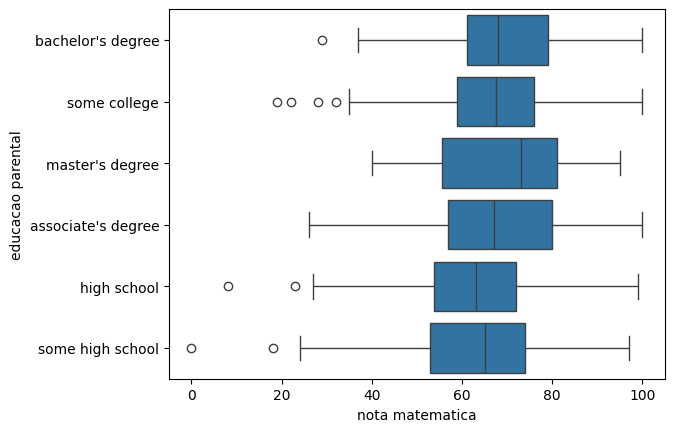

In [36]:
#1 DEMONSTRAR EM GRAFICO BOXPLOT A PERFORMANCE DAS NOTA DE MATEMATICA EM FUNÇÃO DO EDUCACAO PARENTAL
sns.boxplot(data=df,x='nota matematica',y='educacao parental');

In [38]:
#1 TABELA ANALITICA POR EDUCACAO PARENTAL
df.groupby(by=['educacao parental']).describe()['nota matematica'].reset_index()

,educacao parental,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


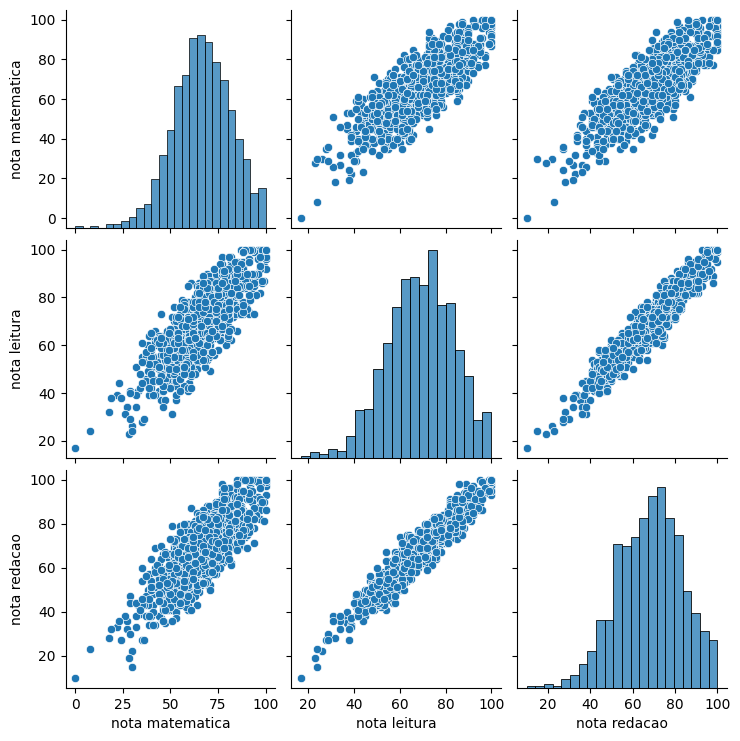

In [32]:
#2. FAZER UM GRID GERAL DA CORRELAÇÃO DAS NOTAS;
sns.pairplot(df);

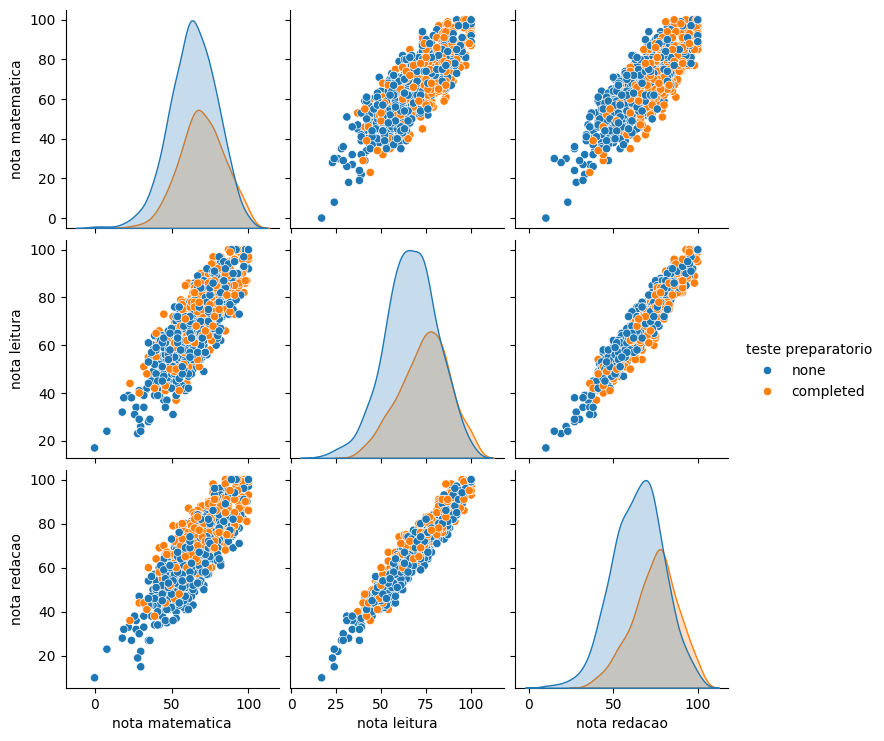

In [39]:
#2. FAZER UM GRID GERAL DA CORRELAÇÃO DAS NOTAS POR CATEGORIA
sns.pairplot(df,hue='teste preparatorio');

## 5. SALVAMENTO DA ANALISE